# **Problem1 : Customer Purchase Behavior Analysis and Loyalty Prediction(or Satisfaction Prediction)**

# **Objective:-**
# **The objective of this project is to develop a predictive model that forecasts customer satisfaction based on various inputs, utilizing data analysis, feature engineering, and machine learning techniques, with the final deliverable being a Flask-based web application for real-time predictions**

# **1. Data Collection**

**1.1 Importing File Formats**

In [72]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**1.2 Loading Dataset**

In [73]:
# Importing CSV file
df=pd.read_csv('/content/Electronic - Electronic.csv')
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


**1.3 Dataset Overview**

In [74]:
#Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

# **2. Understanding the Structure**

**2.1 View the First Few Rows**

In [75]:
# to see all features and observations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [76]:
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


**2.2 Shape of the Data**

In [77]:
df.shape

(5000, 15)

**2.3 View DataFrame Information**

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

**2.4 Summary Statistics**

In [79]:
df.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235391,1.000000


**2.5 View Column Names or Features**

In [80]:
df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time'],
      dtype='object')

**2.6 Feature Abbreviations**

● **Age:** Age of the customer

● **Items Purchased:** Number of items purchased in a single transaction

● **Total Spent:** Total amount spent on the transaction

● **Discount (%):** Percentage discount on the purchase

● **Satisfaction Score:** Self-reported customer satisfaction score

● **Warranty Extension:** Whether the customer opted for warranty extension

● **Gender:** Gender of the customer

● **Region:** Customer's region

● **Product Category:** Category of the purchased product

● **Payment Method:** Payment method used (e.g., UPI, Cash)

● **Revenue:** Total revenue from the customer

● **Store Rating:** Rating given by the customer to the store

● **Loyalty Score:** Customer's loyalty score

● **Membership Status:** Whether the customer is a member

● **Preferred Visit Time:** Preferred time of visit

# **3. Preprocessing**

# **3.1.1 Data Cleaning:**

## **Handle missing values (impute or remove as appropriate).**

In [81]:
#check for missing values
df.isnull().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


The dataset has missing values in the following columns: Gender (2), Payment Method (4), Store Rating (3), Membership Status (6), and Preferred Visit Time (8).

# **3.1.2 Null value handling**

In [82]:
# Step 1: Data Cleaning
# Handle missing values
df['Gender'] = df['Gender'].fillna('Unknown')
df['Payment Method'] = df['Payment Method'].fillna('Unknown')
df['Store Rating'] = df['Store Rating'].fillna(df['Store Rating'].mean())
df['Membership Status'] = df['Membership Status'].fillna(0)
df['Preferred Visit Time'] = df['Preferred Visit Time'].fillna('Unknown')

Categorical columns (like Gender, Payment Method, and Preferred Visit Time) are filled with 'Unknown' to maintain a consistent placeholder for missing information.

Numerical columns (like Store Rating) are filled with the mean value to maintain statistical consistency.

Binary or integer columns (like Membership Status) are filled with 0, representing an absence of membership.

In [83]:
df.isnull().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


#**Convert data type of store rating,satisfaction score and loyalty score  float to int**

In [84]:

# Convert 'Store Rating', 'Satisfaction Score', and 'Loyalty Score' to integers
df['Store Rating'] = df['Store Rating'].astype(int)
df['Loyalty Score'] = df['Loyalty Score'].astype(int)
df['Satisfaction Score'] = df['Satisfaction Score'].astype(int)

# Round 'Total Spent' and 'Revenue' to 2 decimal places
df['Total Spent'] = df['Total Spent'].round(2)
df['Revenue'] = df['Revenue'].round(2)

# Display the updated data types
df.dtypes


,0
Age,int64
Items Purchased,int64
Total Spent,float64
Discount (%),float64
Satisfaction Score,int64
Warranty Extension,int64
Gender,object
Region,object
Product Category,object
Payment Method,object


**Save new dataset**

In [85]:
df.to_csv('modified_data.csv', index=False)

# **3.2.1 EDA**

# **3.1 Univariate Analysis**

Univariate analysis is a statistical method that examines the distribution, central tendency and spread of a variable within itself. The aim is to describe and summarize the characteristics of a variable.

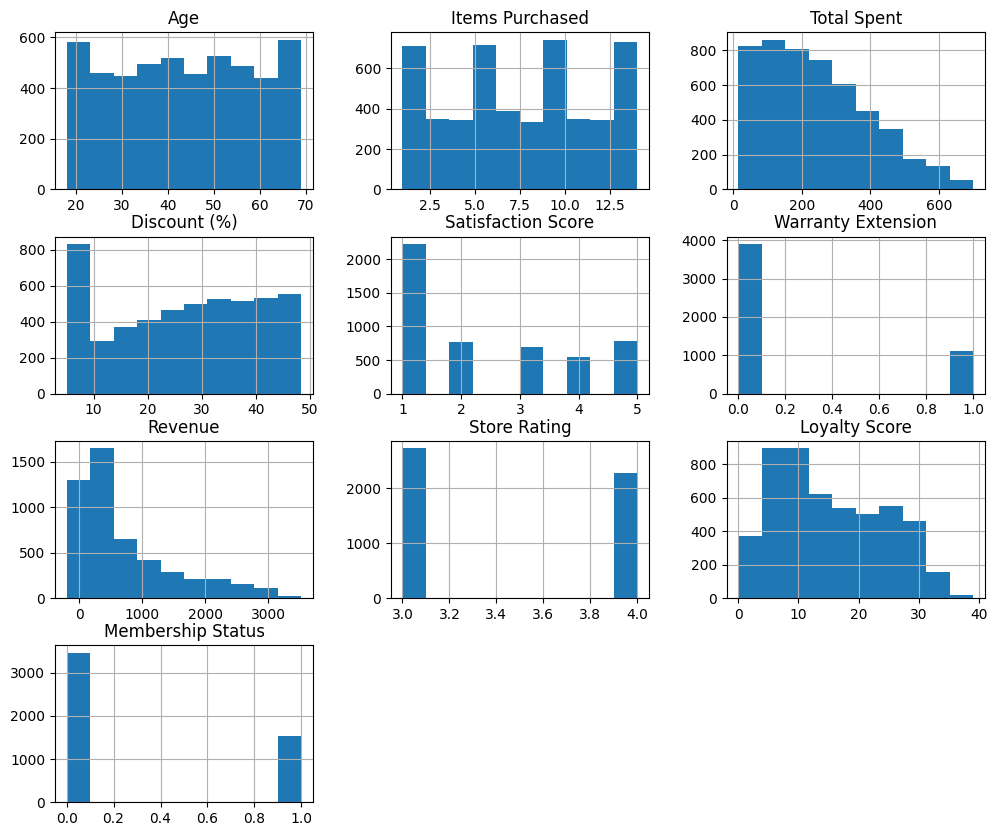

In [86]:
df.hist(figsize=(12, 10))
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Distribution of Numerical Features')
plt.xticks(rotation=45)  # Improve readability for categorical features
plt.show()

# **Distribution of Satisfaction Score**

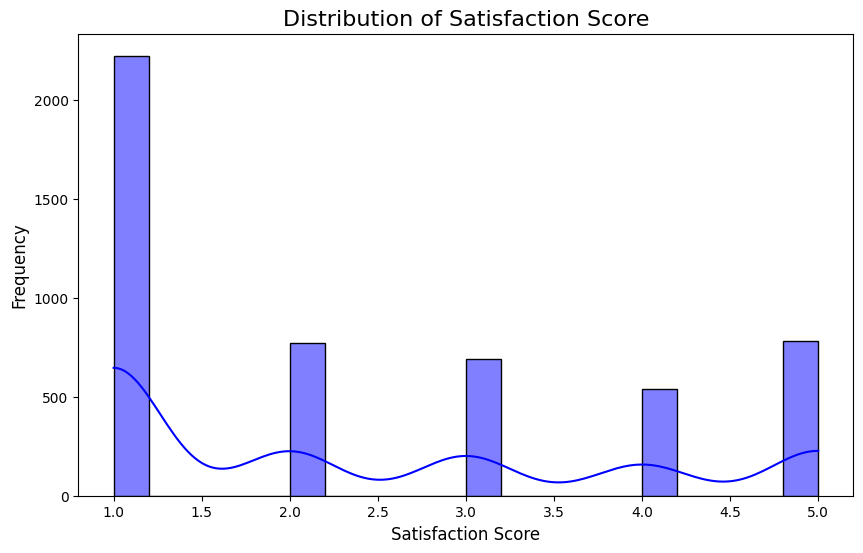

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Satisfaction Score'], bins=20, color='blue', kde=True)
plt.title('Distribution of Satisfaction Score', fontsize=16)
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# **Distribution of Loyalty Score**

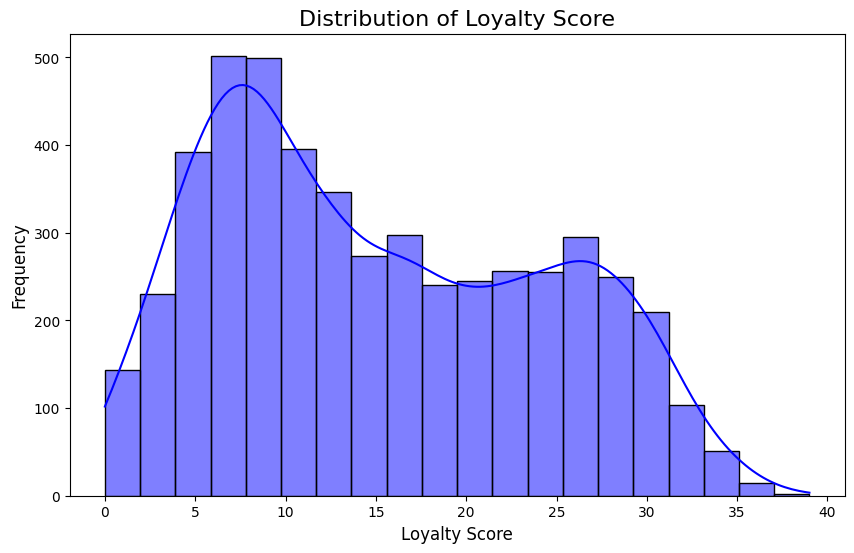

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Loyalty Score'], bins=20, color='blue', kde=True)
plt.title('Distribution of Loyalty Score', fontsize=16)
plt.xlabel('Loyalty Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

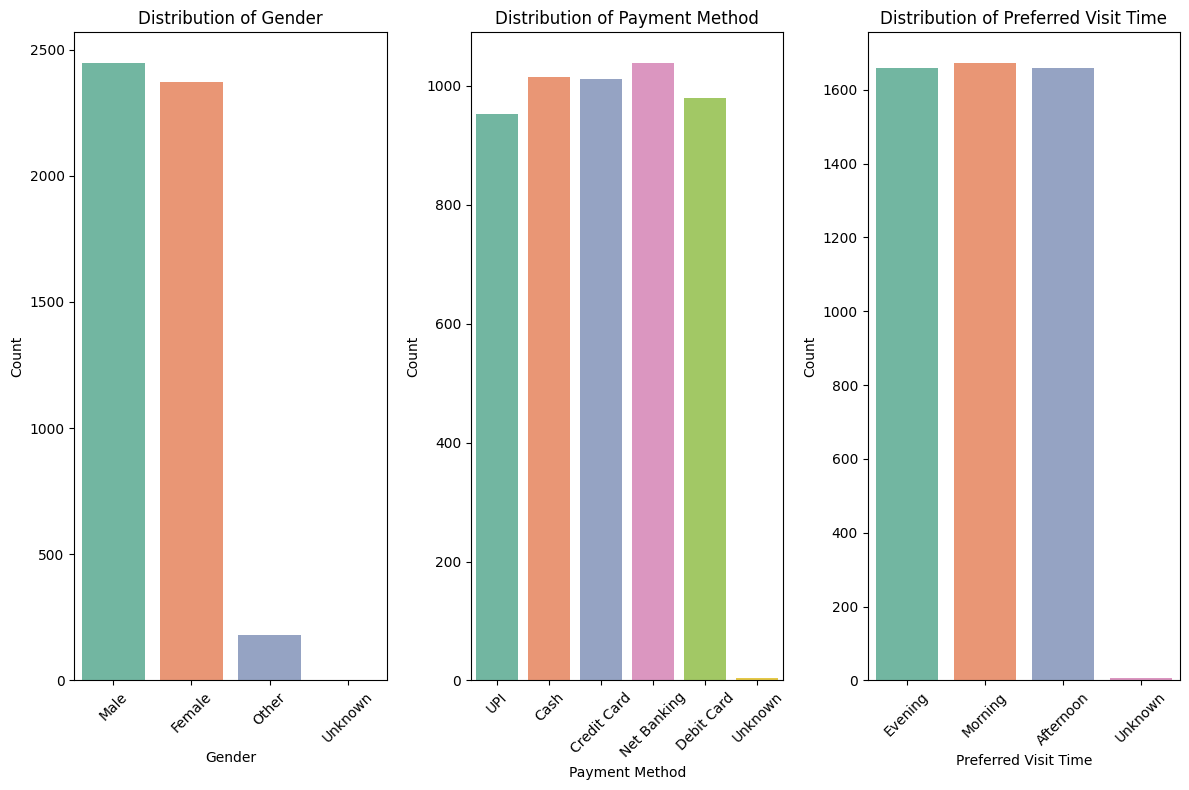

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of discrete columns to plot
discrete_columns = ['Gender', 'Payment Method', 'Preferred Visit Time']
# Set up the plotting area
plt.figure(figsize=(12, 8))
# Loop over each discrete column and create a bar plot
for i, column in enumerate(discrete_columns, 1):
    plt.subplot(1, 3, i)  # Creates a 1x3 grid for plotting
    sns.countplot(x=column, data=df, palette="Set2")  # Countplot to show frequency
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


# **Distribution of Store Rating**

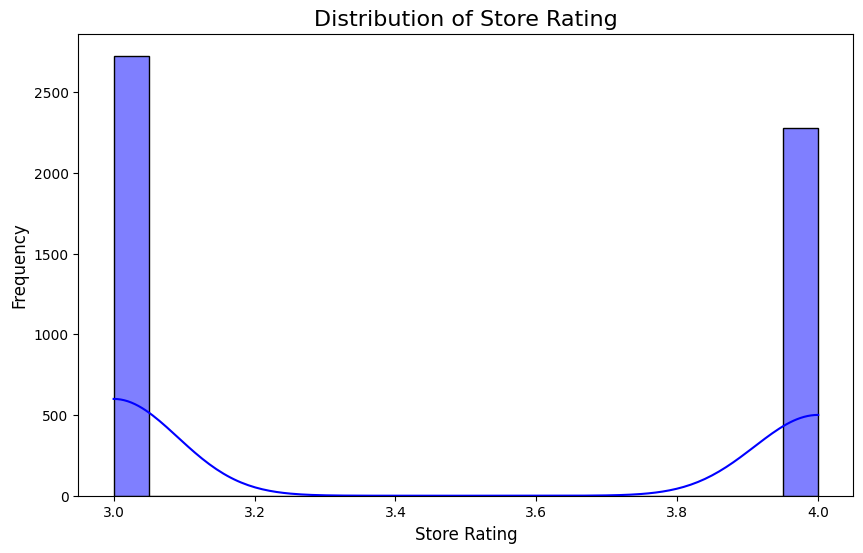

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Store Rating'], bins=20, color='blue', kde=True)
plt.title('Distribution of Store Rating', fontsize=16)
plt.xlabel('Store Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# **Distribution of Total Spent**

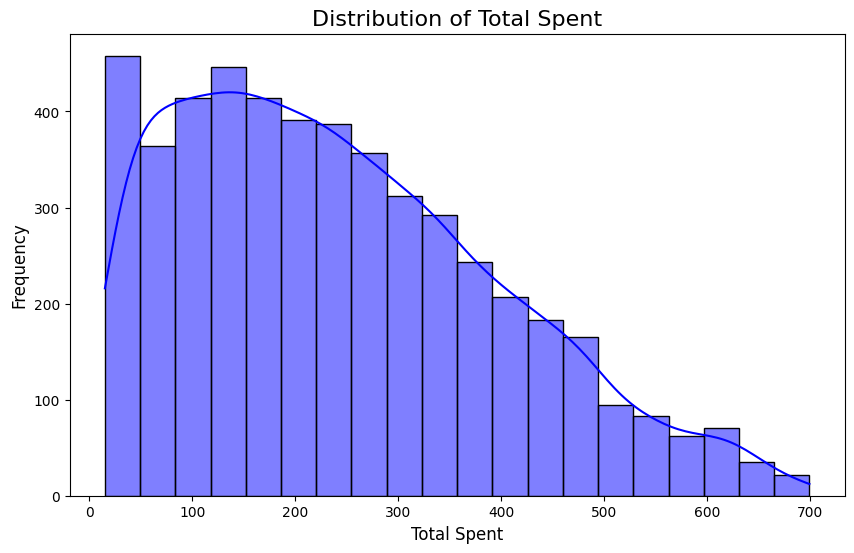

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Spent'], bins=20, color='blue', kde=True)
plt.title('Distribution of Total Spent', fontsize=16)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# **3.2 Bivariate analysis**

# **Total Spent vs. Satisfaction Score:**

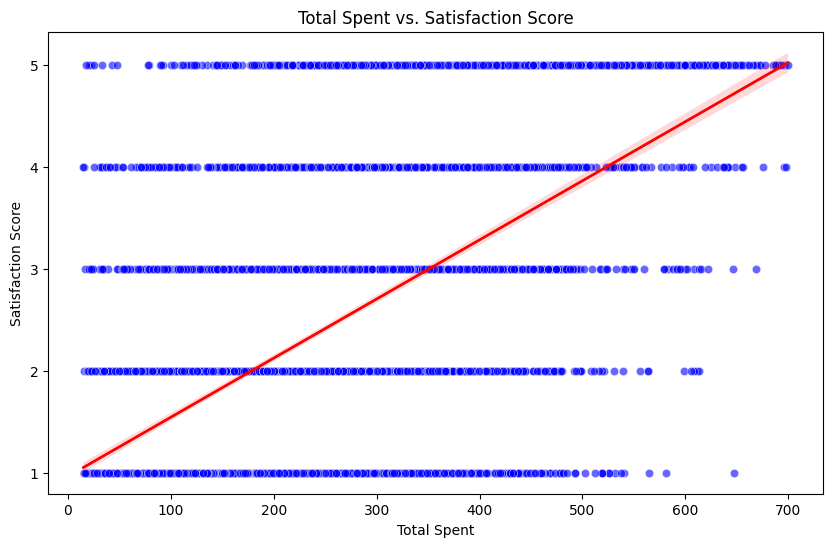

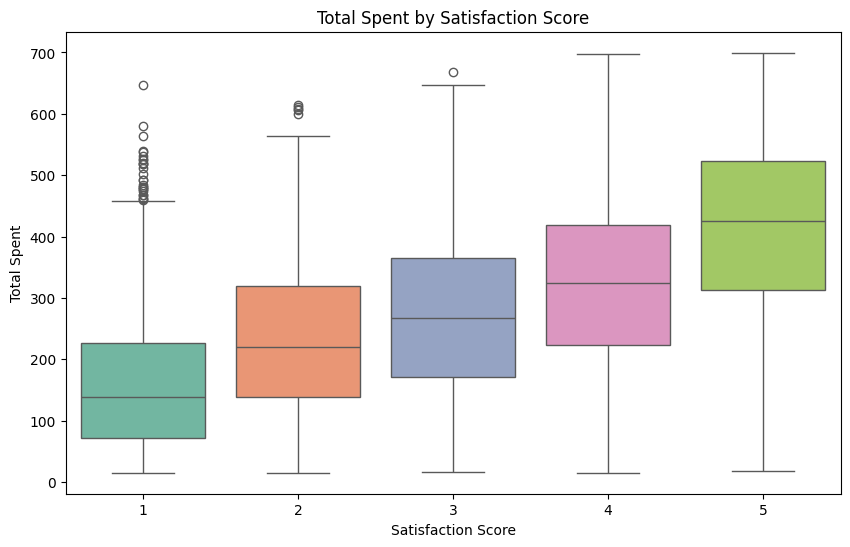

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# If Satisfaction Score is continuous, use scatter plot
plt.figure(figsize=(10, 6))
# Scatter Plot (if Satisfaction Score is continuous)
sns.scatterplot(x='Total Spent', y='Satisfaction Score', data=df, color='blue', alpha=0.6)
plt.title('Total Spent vs. Satisfaction Score')
plt.xlabel('Total Spent')
plt.ylabel('Satisfaction Score')
# Optional: Add a regression line (if you want to see the trend)
sns.regplot(x='Total Spent', y='Satisfaction Score', data=df, scatter=False, color='red', line_kws={'linewidth': 2})
plt.show()
# If Satisfaction Score is categorical, use box plot
plt.figure(figsize=(10, 6))
# Box Plot (if Satisfaction Score is categorical)
sns.boxplot(x='Satisfaction Score', y='Total Spent', data=df, palette="Set2")
plt.title('Total Spent by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Total Spent')
plt.show()


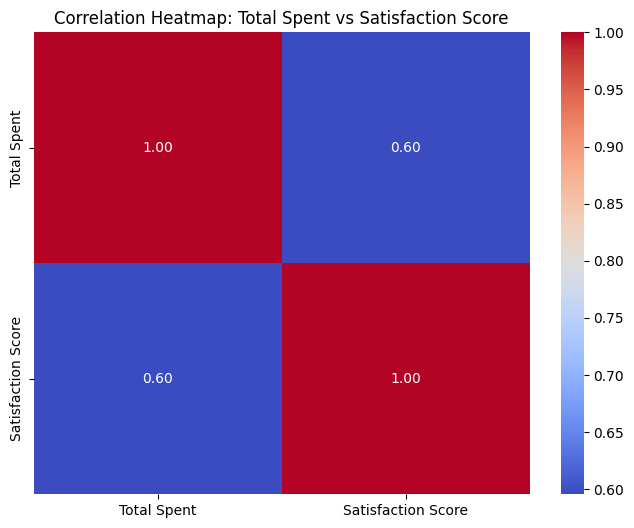

In [93]:
# Correlation Heatmap
correlation_matrix = df[['Total Spent', 'Satisfaction Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Total Spent vs Satisfaction Score')
plt.show()

The data suggests that there is a positive association between the amount spent and customer satisfaction. Customers who spend more tend to have higher satisfaction scores. However, the relationship is not perfectly linear, and there are variations in spending patterns for different satisfaction levels.The analysis suggests that customers who spend more are generally more satisfied, but other factors like product quality, service, and customer loyalty also play a significant role in influencing customer satisfaction.

# **Items Purchased vs. Discount (%):**

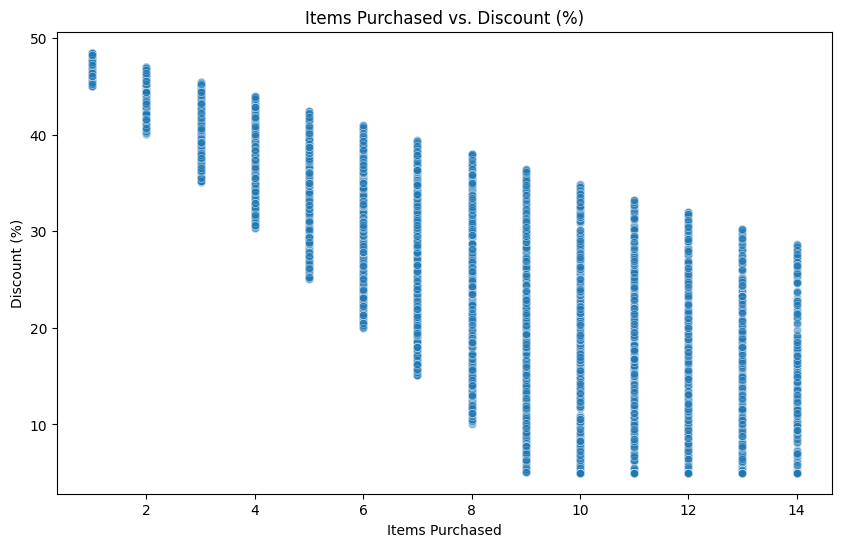

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Items Purchased', y='Discount (%)', data=df, alpha=0.5)  # Adjust alpha for better visualization if needed
plt.title('Items Purchased vs. Discount (%)')
plt.xlabel('Items Purchased')
plt.ylabel('Discount (%)')
plt.show()

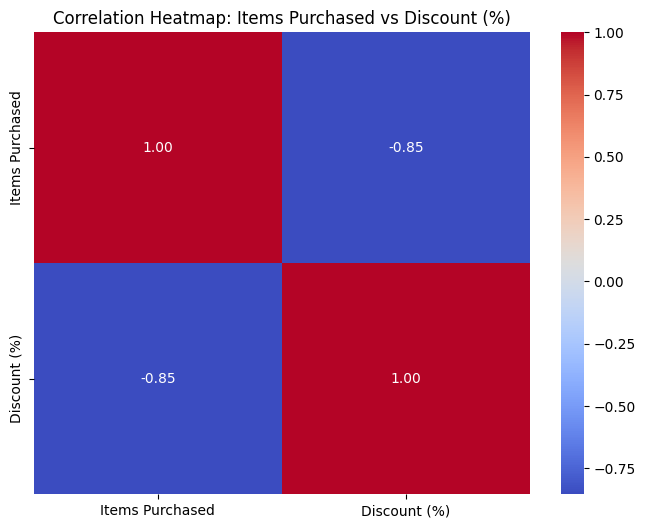

In [95]:
# Correlation Heatmap
correlation_matrix = df[['Items Purchased','Discount (%)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Items Purchased vs Discount (%)')
plt.show()

The analysis suggests that customers who purchase more items typically receive smaller discounts, while those who purchase fewer items receive larger discounts. This pattern could be due to factors like bulk discounts, customer loyalty programs, or targeted promotional strategies.

# **Satisfaction Score and Loyalty Score:**

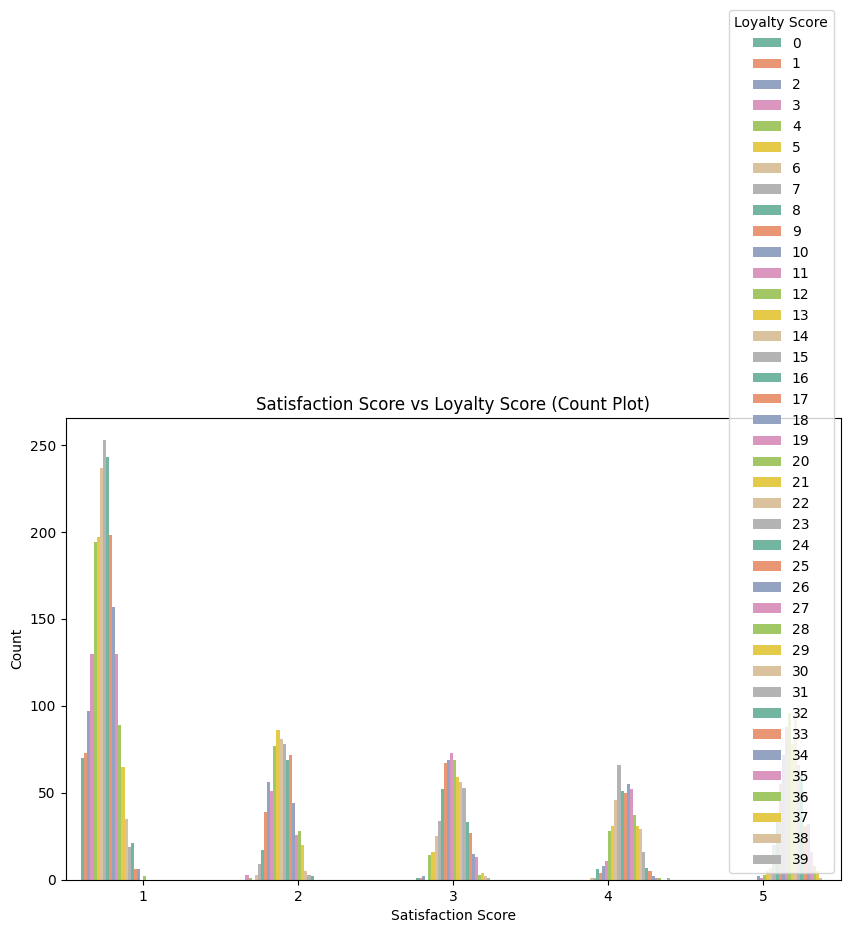

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count Plot for Satisfaction Score and Loyalty Score
plt.figure(figsize=(10, 6))

# Plotting Satisfaction Score by Loyalty Score using a count plot
sns.countplot(x='Satisfaction Score', hue='Loyalty Score', data=df, palette="Set2")
plt.title('Satisfaction Score vs Loyalty Score (Count Plot)')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Loyalty Score')
plt.show()

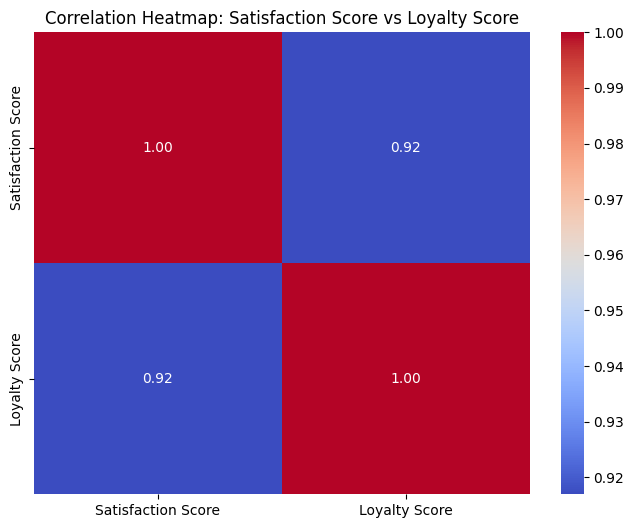

In [97]:
# Correlation Heatmap
correlation_matrix = df[['Satisfaction Score','Loyalty Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Satisfaction Score vs Loyalty Score')
plt.show()

# **Items Purchased Vs Total Spent**

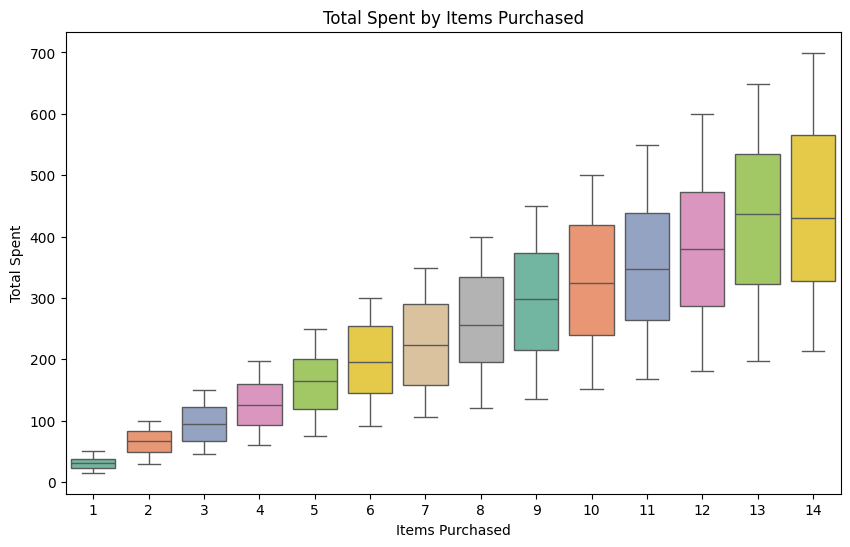

In [98]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Items Purchased', y='Total Spent', data=df, palette="Set2")
plt.title('Total Spent by Items Purchased')
plt.xlabel('Items Purchased')
plt.ylabel('Total Spent')
plt.show()

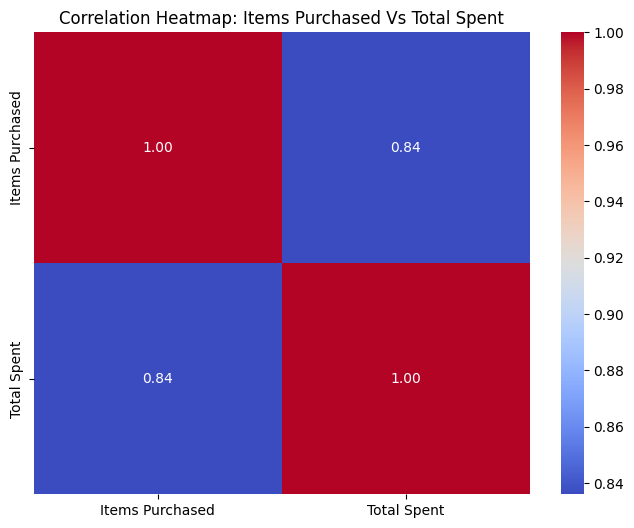

In [99]:
# Correlation Heatmap
correlation_matrix = df[['Items Purchased','Total Spent']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Items Purchased Vs Total Spent')
plt.show()

The plot reveals a clear upward trend. As the number of items purchased increases, the total amount spent also tends to increase. This is evident from the way the boxes shift upward as we move from left to right across the x-axis.

# **Satisfaction Score vs Gender**

In [100]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Gender')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 0.5224613702292117
p-value: 0.666827954042116


Interpretation: Result: Since the p-value is greater than 0.05, you fail to reject the null hypothesis. This implies that there is no statistically significant relationship between the categorical variable and the target variable (satisfaction score) at the 0.05 significance level.

Conclusion: The categorical variable you tested likely does not have a meaningful impact on the target variable.

# **Satisfaction Score vs Region**

In [101]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Region')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 0.46172971461678625
p-value: 0.7090226641509298


The p-value (0.667) is significantly higher than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis.
There is no statistically significant difference in the Satisfaction Scores across the different Regions based on this ANOVA test.

# **Satisfaction Score vs Product Category**

In [102]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Product Category')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 1.239994631045571
p-value: 0.29158119731273646


There is no significant difference in Satisfaction Scores between the Product Categories based on this ANOVA test. The variations in Satisfaction Scores could be due to random chance rather than differences between the product categories.

# **Satisfaction Score vs Payment Method**

In [103]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Payment Method')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 2.2206833438765443
p-value: 0.049539683662392996


The results indicate that Payment Method does have a significant effect on Satisfaction Scores, and the differences in satisfaction scores across different payment methods are unlikely to be due to random chance.

# **Satisfaction Score vs Preferred Visit Time**

In [104]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Preferred Visit Time')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 0.39585775248913135
p-value: 0.7559916281809361


Since the p-value (0.755) is greater than 0.05, we fail to reject the null hypothesis. This means that there is no statistically significant difference in Satisfaction Scores across the different Preferred Visit Times.

In [105]:
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.23,47.077380,1,1,Male,South,Accessories,UPI,149.25,3,3,1.0,Evening
1,69,10,420.14,7.985739,3,1,Female,South,Accessories,Cash,1485.52,3,25,1.0,Evening
2,46,4,127.74,37.225718,1,1,Male,East,Laptop,Credit Card,85.55,3,7,1.0,Morning
3,32,9,417.72,8.227732,1,0,Female,East,Tablet,UPI,824.12,3,7,1.0,Afternoon
4,60,13,608.03,5.000000,3,0,Female,South,Tablet,UPI,2463.59,3,29,0.0,Morning


# **Multivariate Analysis**

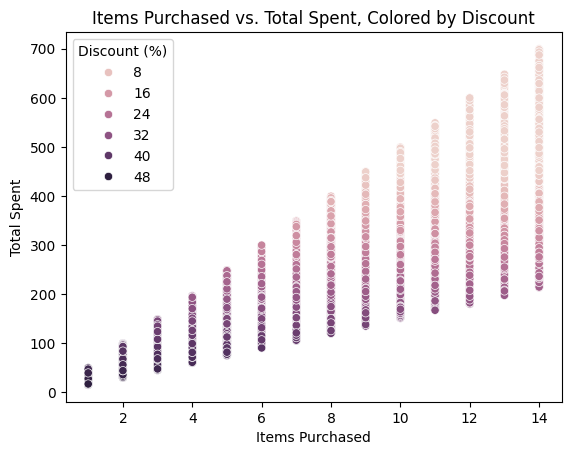

In [106]:
# Color-coded scatter plot
sns.scatterplot(x='Items Purchased', y='Total Spent', hue='Discount (%)', data=df)
plt.title('Items Purchased vs. Total Spent, Colored by Discount')
plt.show()

The graph suggests that while discounts can boost sales, their effectiveness depends on various factors, including product value, promotional strategies, and data limitations. Businesses need to balance discount offers with profitability to maximize their impact.

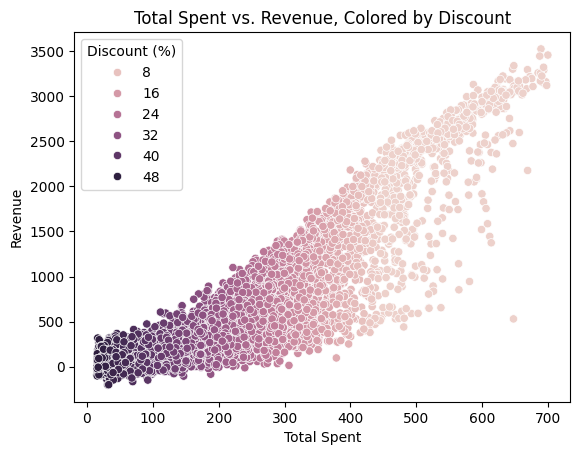

In [107]:
# Color-coded scatter plot
sns.scatterplot(x='Total Spent', y='Revenue', hue='Discount (%)', data=df)
plt.title('Total Spent vs. Revenue, Colored by Discount')
plt.show()

The graph shows that as customers spend more, the company's revenue generally increases. However, offering higher discounts seems to reduce revenue. The company could benefit from a pricing strategy that balances discounts and revenue, and by understanding different customer segments and their price sensitivity. Further analysis could reveal more insights, such as the impact of specific promotions and seasonal trends.

# **4.1.1 Outlier checking**

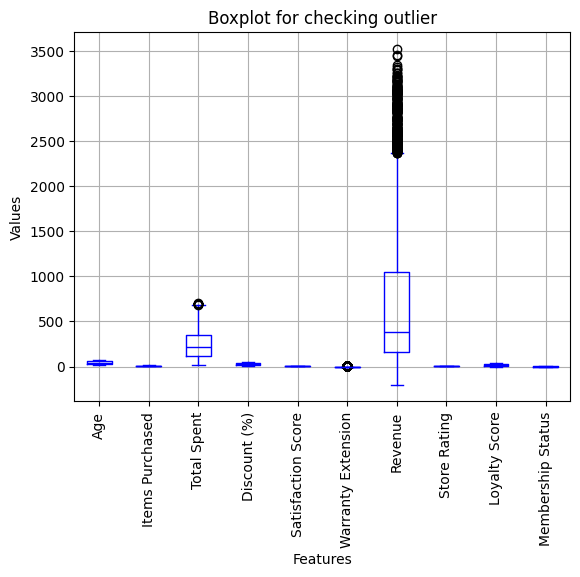

In [108]:
# Outlier checking using boxplot
df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [109]:
# prompt: check outliers of each column with values
#Here Winsorization(capping)-Replaces outliers with a threshold value (percentile-based)
def detect_outliers_iqr(data):
    """
    Detects outliers using the Interquartile Range (IQR) method.

    Args:
        data (pd.Series): A pandas Series representing a column of data.

    Returns:
        tuple: A tuple containing two lists: outliers and outlier indices.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_indices = outliers.index.tolist()
    return outliers, outlier_indices

# Iterate through numerical columns and detect outliers
for col in df.select_dtypes(include=np.number):  # Select only numerical columns
  outliers, outlier_indices = detect_outliers_iqr(df[col])
  if not outliers.empty:  # Check if any outliers were found
    print(f"Outliers detected in column '{col}':")
    print(outliers)
    print(f"Indices of outliers in column '{col}': {outlier_indices}")
  else:
    print(f"No outliers detected in column '{col}'")

No outliers detected in column 'Age'
No outliers detected in column 'Items Purchased'
Outliers detected in column 'Total Spent':
205     693.42
385     690.20
432     695.41
556     690.57
786     696.49
796     699.61
949     689.15
2131    688.28
2319    688.25
2502    697.85
2930    690.43
3155    693.14
4500    687.28
Name: Total Spent, dtype: float64
Indices of outliers in column 'Total Spent': [205, 385, 432, 556, 786, 796, 949, 2131, 2319, 2502, 2930, 3155, 4500]
No outliers detected in column 'Discount (%)'
No outliers detected in column 'Satisfaction Score'
Outliers detected in column 'Warranty Extension':
0       1
1       1
2       1
7       1
15      1
22      1
24      1
25      1
30      1
37      1
45      1
50      1
51      1
52      1
54      1
55      1
60      1
67      1
68      1
69      1
70      1
74      1
84      1
87      1
89      1
90      1
91      1
92      1
94      1
95      1
99      1
104     1
112     1
114     1
126     1
128     1
130     1
132    

The outliers in "Revenue" and "Total Spent" appear to be significantly higher than the rest of the data points, potentially indicating genuine high-value customers or potential data anomalies.I chose the Winsorization technique to handle outliers because the extreme values are genuine and represent valid, rare occurrences in the dataset, and I wanted to reduce their impact without losing valuable information.So not removing outliers is a good approach.

**Based on the ANOVA test results, the columns Gender, Region, Product Category, and Preferred Visit Time do not have a statistically significant relationship with Satisfaction Score and can be removed. The column Payment Method shows a significant relationship and should be kept.**

# **4.2 Feature Selection**

**Correlation in Data frame**

                         Age  Items Purchased  Total Spent  Discount (%)  \
Age                 1.000000        -0.005522    -0.003213      0.000439   
Items Purchased    -0.005522         1.000000     0.836032     -0.853837   
Total Spent        -0.003213         0.836032     1.000000     -0.979015   
Discount (%)        0.000439        -0.853837    -0.979015      1.000000   
Satisfaction Score -0.003684         0.483858     0.595588     -0.581012   
Warranty Extension -0.034065         0.064381     0.121439     -0.086038   
Revenue            -0.006344         0.674361     0.882421     -0.829426   
Store Rating       -0.019168         0.018532     0.018680     -0.018927   
Loyalty Score       0.010073         0.557937     0.669551     -0.658873   
Membership Status   0.000485         0.006543    -0.000557      0.004464   

                    Satisfaction Score  Warranty Extension   Revenue  \
Age                          -0.003684           -0.034065 -0.006344   
Items Purchased    

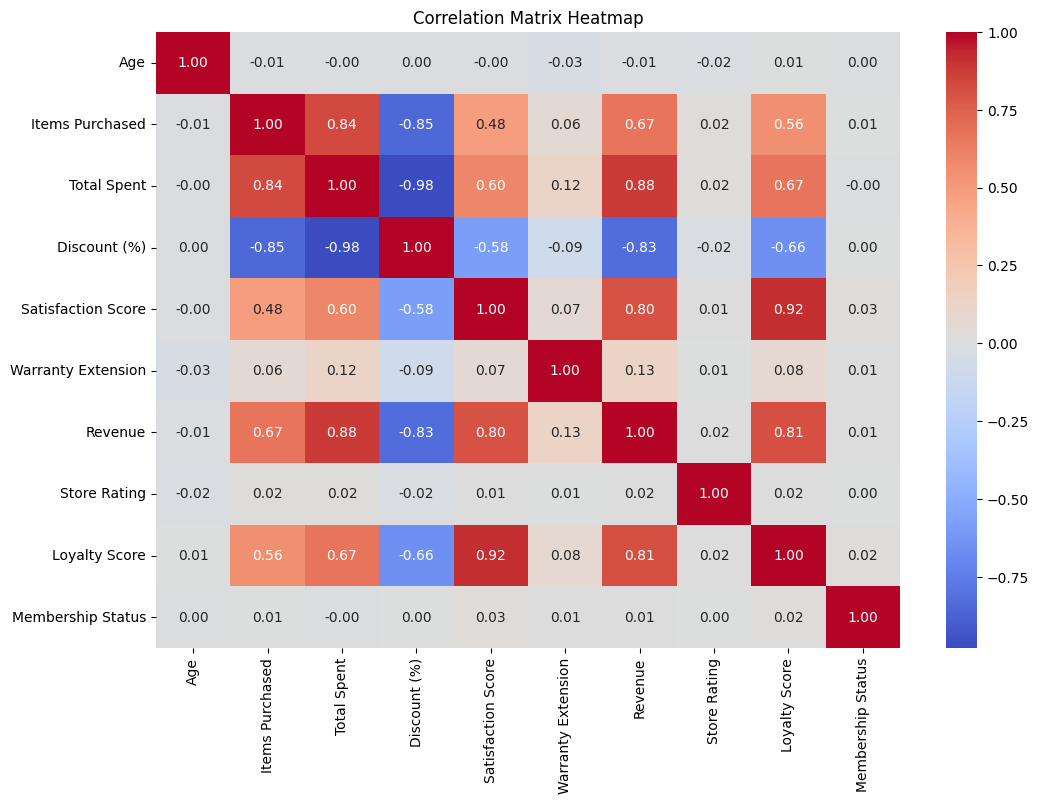

In [110]:
# prompt: correlation in dataframe
df_num = df[['Age', 'Items Purchased', 'Total Spent', 'Discount (%)','Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating','Loyalty Score', 'Membership Status']]

# Calculate the correlation matrix
df_corr = df_num.corr()
# Display the correlation matrix
print(df_corr)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Positive Relationships:

Satisfaction Score and Loyalty Score: Customers who are more satisfied tend to be more loyal.
Items Purchased and Total Spent: Customers who purchase more items also tend to spend more overall.
Total Spent and Revenue: Higher spending leads to higher revenue.
Items Purchased and Revenue: More items purchased contribute to higher revenue.
Negative Relationships:

Discount (%) and Revenue: Higher discounts tend to lead to lower revenue.
Membership Status and Revenue: Members seem to contribute less to revenue compared to non-members.
Other Observations:

Store Rating: It doesn't seem to have strong correlations with other variables, suggesting it might not be a significant factor in customer behavior.
Warranty Extension: While it has some positive correlations, the relationships are not very strong.
Overall, the heatmap suggests that customer satisfaction, loyalty, and spending behavior are closely linked. The company might want to focus on strategies that improve customer satisfaction and encourage repeat purchases to boost revenue. Additionally, the pricing strategy, particularly regarding discounts, should be carefully considered to optimize revenue.

In [111]:
df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time'],
      dtype='object')

In [112]:
df=df.drop(['Age','Membership Status','Discount (%)','Gender','Region','Product Category'], axis=1)

The columns "Age," "Membership Status," "Discount (%)," "Gender," "Region," and "Product Category" were removed from the dataset. This means that these specific demographic, geographic, and product-related factors will not be considered in the analysis.

The analysis will focus on other variables such as "Items Purchased," "Total Spent," "Satisfaction Score," "Loyalty Score," "Warranty Extension," "Store Rating," and "Revenue." These variables will be used to understand the relationships between customer behavior, spending habits, and overall revenue.

In [113]:
df_scopy=df.copy()

In [114]:
df_scopy.columns

Index(['Items Purchased', 'Total Spent', 'Satisfaction Score',
       'Warranty Extension', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Preferred Visit Time'],
      dtype='object')

# **5.1.1 Parameters of train_test_split:**

In [115]:
x=df_scopy.drop(['Satisfaction Score'],axis=1)
y=df_scopy['Satisfaction Score']

In [116]:
y.median()

2.0

# **Binary classification: Convert Satisfaction Score to Low (0) or High (1)**

In [117]:

y = y > y.median()

In [118]:
y.value_counts()

,count
Satisfaction Score,
False,2992
True,2008


In [119]:
x.columns

Index(['Items Purchased', 'Total Spent', 'Warranty Extension',
       'Payment Method', 'Revenue', 'Store Rating', 'Loyalty Score',
       'Preferred Visit Time'],
      dtype='object')

# **5.1.2 Train and test splitting**

In [120]:
# Step 3: Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Identifying Categorical and Numerical Features**

In [121]:
# Step 4: Identify Categorical and Numerical Columns
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

# **Define Preprocessing Pipeline for Categorical Features**

In [122]:

# Step 5: Define Preprocessing Pipelines
# Categorical pipeline: Imputation + OneHotEncoding
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

# **Define Preprocessing Pipeline for Numerical Features**

In [123]:
# Numerical pipeline: Standard Scaling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# **Combine Preprocessing Pipelines using ColumnTransformer**

In [124]:

# Combine preprocessors into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

We used ColumnTransformer here to apply different preprocessing steps (scaling for numerical features and encoding for categorical features) to the respective columns in a single, unified process.

# **Model Selection**

# **Random Forest Model**

In [125]:
# Step 6: Create Model Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [126]:
# Step 7: Train the Model
model.fit(X_train, y_train)

# Step 8: Evaluate the Model
y_pred = model.predict(X_test)

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))
#print(classification_report(y_test, y_pred))

Accuracy is 0.939
Precision is 0.939
Recall is 0.939
f1 score is 0.939


In the pipeline approach, the preprocessing steps and model are combined into a single sequence, which makes the process more streamlined and consistent.

# **Logistic Regression**

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Update the model pipeline to use Logistic Regression
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])


In [129]:
# Step 7: Train the Model
lr.fit(X_train, y_train)

# Step 8: Evaluate the Model
y_pred1 = lr.predict(X_test)

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred1))
print('Precision is', precision_score(y_test, y_pred1,average='micro'))
print('Recall is', recall_score(y_test, y_pred1,average='micro'))
print('f1 score is', f1_score(y_test,y_pred1,average='micro'))
#print(classification_report(y_test, y_pred))

Accuracy is 0.95
Precision is 0.95
Recall is 0.95
f1 score is 0.95


**Save Pickle file**

In [131]:
import joblib
joblib.dump(model, 'logistic_model.pkl')

['logistic_model.pkl']

# **DecisionTreeClassifier**

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Update the model pipeline to use Logistic Regression
dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
dt.fit(X_train, y_train)

# Step 8: Evaluate the Model
y_pred2 = dt.predict(X_test)

In [133]:
print('Accuracy is', accuracy_score(y_test, y_pred2))
print('Precision is', precision_score(y_test, y_pred2,average='micro'))
print('Recall is', recall_score(y_test, y_pred2,average='micro'))
print('f1 score is', f1_score(y_test,y_pred2,average='micro'))

Accuracy is 0.924
Precision is 0.924
Recall is 0.924
f1 score is 0.924


Logistic Regression is the best-performing model in this case based on Accuracy, Precision, Recall, and F1 Score, with all values being 0.95.

Random Forest is close behind with 0.94 for all metrics, while Decision Tree Classifier has the lowest performance with 0.924 for all metrics.

Therefore, Logistic Regression is the best model among the three, followed closely by Random Forest.

# **Hyper parametre tuning of Logistic Regression model**

**Grid search CV**

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define parameter grid for Logistic Regression hyperparameters
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Regularization strength
    'classifier__solver': ['liblinear', 'saga'],  # Solvers for optimization
    'classifier__max_iter': [100, 500, 1000]  # Maximum iterations
}

# Set up the pipeline (same as before)
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your preprocessing step
    ('classifier', LogisticRegression(random_state=42))  # Logistic Regression model
])

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Step 8: Evaluate the Tuned Model
y_pred1 = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       579
        True       0.96      0.92      0.94       421

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



# **Hyper parametre tuning of Random Forest Classifier model**

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define parameter grid for Random Forest hyperparameters
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'classifier__bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}

# Set up the pipeline (same as before)
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your preprocessing step
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Step 8: Evaluate the Tuned Model
y_pred1 = best_model.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.94      0.96      0.95       579
        True       0.94      0.91      0.93       421

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



After hyperparameter tuning, the Logistic Regression model performed excellently, and as a result, it has been selected as the final model for deployment.

# **Cross-Validation for Logistic Regression Model**

In [136]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the model pipeline with Logistic Regression
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your preprocessing step
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))  # Logistic Regression model
])

# Perform 5-fold cross-validation and compute multiple metrics
cv_results = cross_validate(lr, X_train, y_train, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

# Print cross-validation results for each metric
print(f"Cross-validation accuracy scores: {cv_results['test_accuracy']}")
print(f"Mean accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Cross-validation precision scores: {cv_results['test_precision_macro']}")
print(f"Mean precision: {cv_results['test_precision_macro'].mean()}")
print(f"Cross-validation recall scores: {cv_results['test_recall_macro']}")
print(f"Mean recall: {cv_results['test_recall_macro'].mean()}")
print(f"Cross-validation F1 scores: {cv_results['test_f1_macro']}")
print(f"Mean F1 score: {cv_results['test_f1_macro'].mean()}")


Cross-validation accuracy scores: [0.9425  0.94875 0.94    0.94375 0.95125]
Mean accuracy: 0.94525
Cross-validation precision scores: [0.9403371  0.94861947 0.93653705 0.94033595 0.95075914]
Mean precision: 0.9433177418331022
Cross-validation recall scores: [0.93937078 0.94400468 0.93838457 0.94261985 0.94723897]
Mean recall: 0.9423237694159559
Cross-validation F1 scores: [0.93984726 0.94617436 0.93743442 0.94143666 0.94891602]
Mean F1 score: 0.9427617441669177


# **Cross-Validation for Random Forest Classifier Model**

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define the model pipeline with Random Forest Classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your preprocessing step
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores.std()}")


Cross-validation accuracy scores: [0.935   0.93875 0.935   0.94125 0.94375]
Mean cross-validation accuracy: 0.93875
Standard deviation of cross-validation accuracy: 0.0034460121880225303


Logistic Regression has a higher mean accuracy (0.94525) compared to Random Forest (0.93975).

Additionally, Logistic Regression has more stable cross-validation scores with a narrower range between the highest and lowest accuracy scores, indicating better consistency in performance across different folds.

Therefore, Logistic Regression is the better model based on these cross-validation results.

**After hyperparameter tuning and cross validation, the Logistic Regression model performed excellently, and as a result, it has been selected as the final model for deployment.**

In [138]:
y.head(10)

,Satisfaction Score
0,False
1,True
2,False
3,False
4,True
5,True
6,True
7,False
8,True
9,False


In [139]:
df_scopy.head(10)

,Items Purchased,Total Spent,Satisfaction Score,Warranty Extension,Payment Method,Revenue,Store Rating,Loyalty Score,Preferred Visit Time
0,1,29.23,1,1,UPI,149.25,3,3,Evening
1,10,420.14,3,1,Cash,1485.52,3,25,Evening
2,4,127.74,1,1,Credit Card,85.55,3,7,Morning
3,9,417.72,1,0,UPI,824.12,3,7,Afternoon
4,13,608.03,3,0,UPI,2463.59,3,29,Morning
5,14,252.83,3,0,Credit Card,737.45,4,16,Morning
6,10,477.77,5,0,Cash,2402.37,4,31,Morning
7,6,263.36,2,1,UPI,554.95,4,13,Afternoon
8,6,256.18,4,0,Net Banking,879.55,3,27,Morning
9,1,22.03,1,0,Credit Card,-18.81,4,4,Morning


**Predict First row**

In [140]:
# prompt: code for predict first row

# Load the saved model
loaded_model = joblib.load('logistic_model.pkl')

# Assuming 'x' is your feature data (DataFrame or array) and the first row is at index 0
first_row = x.iloc[[0]]  # Select the first row

# Make prediction
prediction = loaded_model.predict(first_row)
prediction

array([False])

In [141]:
# prompt: code for predict second row

import joblib

# Load the saved model
loaded_model = joblib.load('logistic_model.pkl')

# Assuming 'x' is your feature data (DataFrame or array) and the second row is at index 1
second_row = x.iloc[[1]]  # Select the second row

# Make prediction
prediction = loaded_model.predict(second_row)
prediction

array([ True])

In [142]:
# prompt: code for predict third row

# Load the saved model
loaded_model = joblib.load('logistic_model.pkl')

# Assuming 'x' is your feature data (DataFrame or array) and the third row is at index 2
third_row = x.iloc[[2]]  # Select the third row

# Make prediction
prediction = loaded_model.predict(third_row)
prediction

array([False])